In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
train_data = pd.read_csv("/kaggle/input/titanic/train.csv")
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
test_data = pd.read_csv("/kaggle/input/titanic/test.csv")
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


# Clean up Data

In [7]:
train_data = train_data.drop(labels=['Cabin'], axis=1)
train_data = train_data.drop(labels=['Name'],axis=1)
train_data = train_data.drop(labels=['Embarked'],axis=1)
train_data = train_data.drop(labels=['Ticket'],axis=1)

In [8]:
test_data = test_data.drop(labels=['Cabin'], axis=1)
test_data = test_data.drop(labels=['Name'],axis=1)
test_data = test_data.drop(labels=['Embarked'],axis=1)
test_data = test_data.drop(labels=['Ticket'],axis=1)

In [9]:
train_data = train_data.replace(to_replace=['male','female'],value=[1,0])

In [10]:
test_data = test_data.replace(to_replace=['male','female'],value=[1,0])

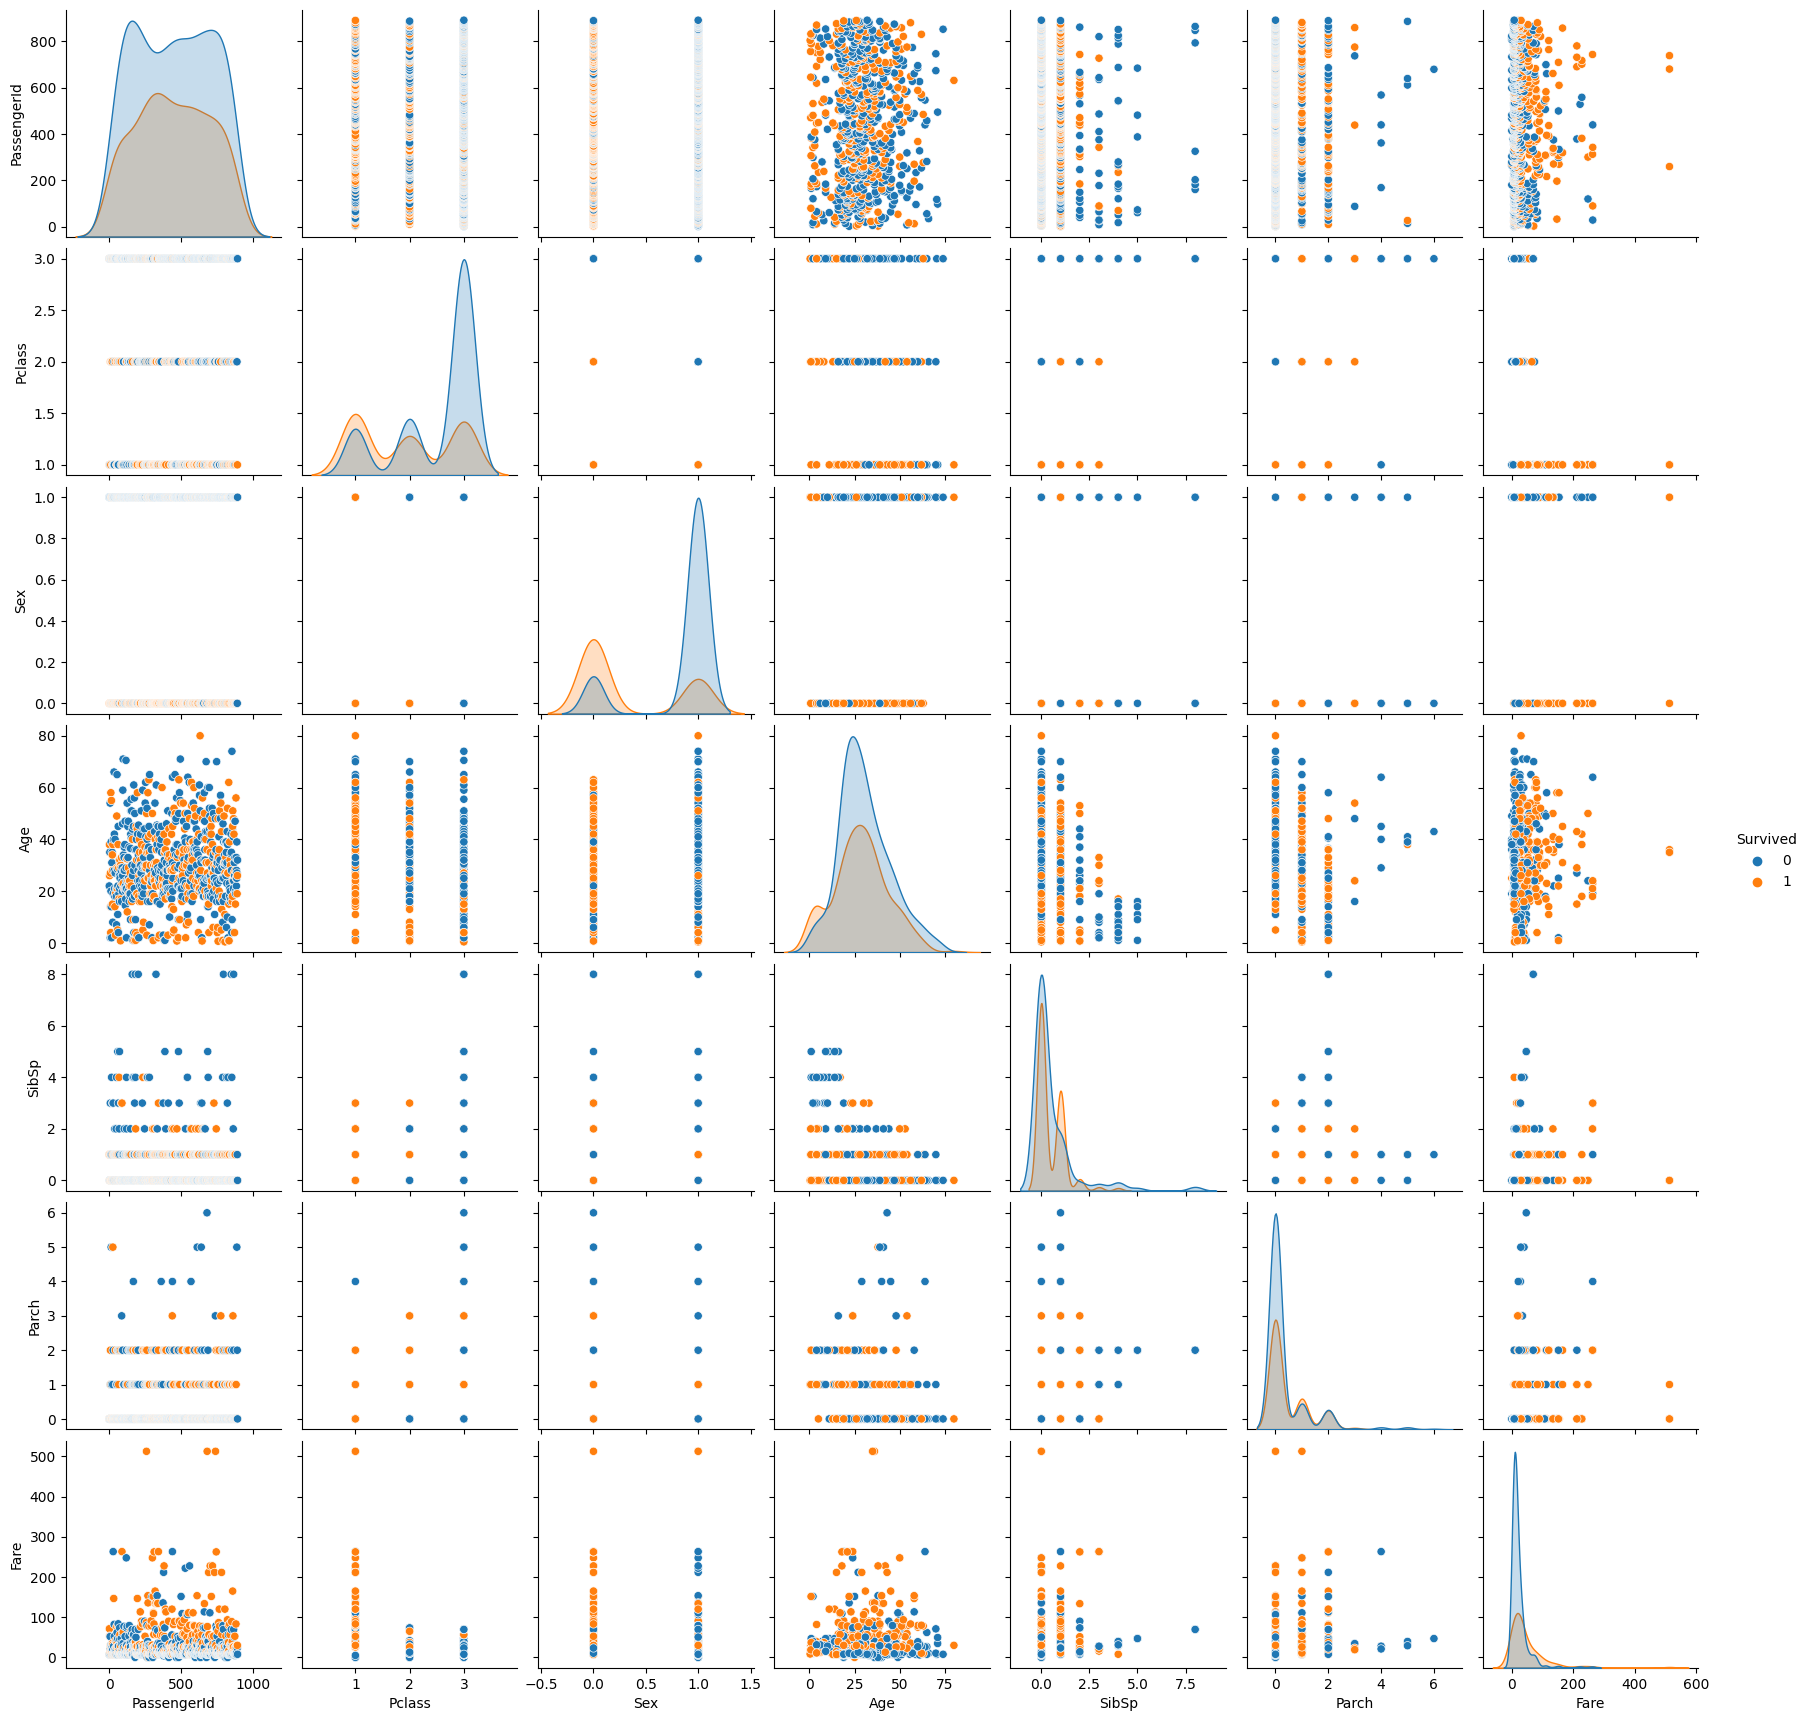

In [11]:
sns.pairplot(train_data, hue='Survived')

We can see from this pairplot, there are correlations between Survival and PClass, Sex, Age.

The likeliness of a Male in Third Class to survive is 13%, the likeliness of a Female in First Class to survive is 96%.

In [12]:
len(train_data[(train_data['Sex'] == 0) & (train_data['Pclass'] == 1) & (train_data['Survived'] == 1)]) / len(train_data[(train_data['Sex'] == 0) & (train_data['Pclass'] == 1)]) 

0.9680851063829787

In [13]:
len(train_data[(train_data['Sex'] == 1) & (train_data['Pclass'] == 3) & (train_data['Survived'] == 1)]) / len(train_data[(train_data['Sex'] == 1) & (train_data['Pclass'] == 3)]) 

0.13544668587896252

We have a lot of null values in Age, this needs correcting.

In [14]:
len(train_data[train_data['Age'].isnull()])

177

In [15]:
train_data['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [16]:
mean = train_data['Age'].mean()
std = train_data['Age'].std()
sample_size = len(train_data[train_data['Age'].isnull()])

distributed_ages = np.random.normal(mean, std, sample_size)
print(distributed_ages)

[ 9.41820868 26.79505457 50.28057271 52.57064218 24.35485029  7.92435809
 54.62606015 29.98178334 16.36882112 32.28461442 36.55004033 30.440239
 36.42983788  4.25390346 40.88356223 18.25109616 37.19345494 31.15189131
  0.38850621 10.21607288 33.14150256  4.68105868 65.36274384 15.00916632
 45.53556635 16.01169553  4.48098598 37.82989082 13.84932487 31.71998359
 21.8649886  37.15045186 27.16523532 26.72625936 26.54802194 37.59934088
 41.6571976  27.7319854  23.67750925 24.71552836  7.55543063 27.14394656
 17.94236372 74.34251976 10.34232343 21.37075119 26.92975321 45.42744934
 52.17300641 27.26318887 34.77682576 28.58375811 30.83811044 24.19435285
 39.63979574  6.93530133 24.94173468 38.84610239 18.65695013 23.96456067
 36.0594012  53.0690456  17.20012794 24.45501292 21.39420168 36.12052512
 20.13062447 40.46651502 12.13068456 26.52034399 53.23075689 25.98354859
 37.61168513 57.64462393 15.32143775 21.86321025 37.70141869 32.01372359
 41.74108831 34.66153122 57.02075776  6.69850782 18.8

In [17]:
a = train_data['Age'].isna()
train_data.loc[a, 'Age'] = distributed_ages

In [18]:
test_data['Age'].describe()

count    332.000000
mean      30.272590
std       14.181209
min        0.170000
25%       21.000000
50%       27.000000
75%       39.000000
max       76.000000
Name: Age, dtype: float64

In [19]:
mean = test_data['Age'].mean()
std = test_data['Age'].std()
sample_size = len(test_data[test_data['Age'].isnull()])

distributed_ages = np.random.normal(mean, std, sample_size)
print(distributed_ages)

[-10.50477254  26.21882225  14.68501063  34.34084422  30.84370293
  40.3094561   27.01677171  30.62723319  28.02329716   0.30203423
  20.7100228   23.34790571  15.8831334   21.36709536  22.87730421
  48.73459089  -2.93384944  28.94593622  10.36096598   3.30296169
  16.58374057  28.332978    45.7331268   37.27615192  25.81383555
  21.27898062  20.41983325  40.64384889  50.40673051  32.47330048
  26.40470391  31.74410437  26.55254586  32.88568144  42.75712357
  33.78678145  61.14390324  29.25144275   3.86016623  31.43280124
  24.20611054  13.66823214  20.92463852  38.20247712  25.37076789
  29.74892631  39.01138983  18.65837025  19.04250817  75.11037594
  29.32033268  29.76130825  45.90599574  21.07328665  16.28723116
  19.15432046   6.02419539  24.51687666   9.55540324  16.99614429
  30.81005976  22.70489925  12.30245742  14.00472319  50.5657818
  59.5509919   43.19844837  39.7320238    3.68870886  17.13416689
  10.65219019  16.95847139  24.17354014  44.22207466  36.01897003
  45.410040

In [20]:
b = test_data['Age'].isna()
test_data.loc[b, 'Age'] = distributed_ages

In [21]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int64  
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
dtypes: float64(2), int64(6)
memory usage: 55.8 KB


In [22]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    int64  
 3   Age          418 non-null    float64
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
 6   Fare         417 non-null    float64
dtypes: float64(2), int64(5)
memory usage: 23.0 KB


Correcting the Fare

In [23]:
test_data[test_data['Fare'].isnull()]

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare
152,1044,3,1,60.5,0,0,NaN


In [24]:
test_data[test_data['Pclass'] == 3]['Fare'].mean()

12.459677880184334

In [25]:
test_data.loc[152, 'Fare'] = test_data[test_data['Pclass'] == 3]['Fare'].mean()

In [26]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    int64  
 3   Age          418 non-null    float64
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
 6   Fare         418 non-null    float64
dtypes: float64(2), int64(5)
memory usage: 23.0 KB


# Analysis

In [27]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int64  
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
dtypes: float64(2), int64(6)
memory usage: 55.8 KB


<Axes: xlabel='Pclass', ylabel='count'>

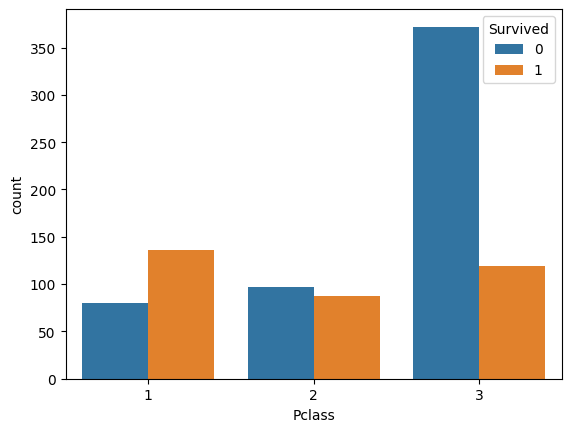

In [28]:
sns.countplot(data=train_data,x='Pclass',hue='Survived')

In [29]:
passenger_class = 1
class1_srate = train_data[train_data['Pclass'] == passenger_class]['Survived'].value_counts()[1] / train_data[train_data['Pclass'] == passenger_class]['Survived'].count()

passenger_class = 2
class2_srate = train_data[train_data['Pclass'] == passenger_class]['Survived'].value_counts()[1] / train_data[train_data['Pclass'] == passenger_class]['Survived'].count()

passenger_class = 3
class3_srate = train_data[train_data['Pclass'] == passenger_class]['Survived'].value_counts()[1] / train_data[train_data['Pclass'] == passenger_class]['Survived'].count()

print("Class 1 Survival Rate: ", class1_srate)
print("Class 2 Survival Rate: ", class2_srate)
print("Class 3 Survival Rate: ", class3_srate)

Class 1 Survival Rate:  0.6296296296296297
Class 2 Survival Rate:  0.47282608695652173
Class 3 Survival Rate:  0.24236252545824846


In [30]:
male = 1
female = 0

male_srate = train_data[train_data['Sex'] == male]['Survived'].value_counts()[1] / train_data[train_data['Sex'] == male]['Survived'].count()
female_srate = train_data[train_data['Sex'] == female]['Survived'].value_counts()[1] / train_data[train_data['Sex'] == female]['Survived'].count()

print("Male Survival Rate: ", male_srate)
print("Female Survival Rate: ", female_srate)

Male Survival Rate:  0.18890814558058924
Female Survival Rate:  0.7420382165605095


In [31]:
female_first_class = len(train_data[(train_data['Sex'] == 0) & (train_data['Pclass'] == 1) & (train_data['Survived'] == 1)]) / len(train_data[(train_data['Sex'] == 0) & (train_data['Pclass'] == 1)]) 
male_first_class = len(train_data[(train_data['Sex'] == 1) & (train_data['Pclass'] == 1) & (train_data['Survived'] == 1)]) / len(train_data[(train_data['Sex'] == 1) & (train_data['Pclass'] == 1)]) 

female_sec_class = len(train_data[(train_data['Sex'] == 0) & (train_data['Pclass'] == 2) & (train_data['Survived'] == 1)]) / len(train_data[(train_data['Sex'] == 0) & (train_data['Pclass'] == 2)]) 
male_sec_class = len(train_data[(train_data['Sex'] == 1) & (train_data['Pclass'] == 2) & (train_data['Survived'] == 1)]) / len(train_data[(train_data['Sex'] == 1) & (train_data['Pclass'] == 2)]) 

female_third_class = len(train_data[(train_data['Sex'] == 0) & (train_data['Pclass'] == 3) & (train_data['Survived'] == 1)]) / len(train_data[(train_data['Sex'] == 0) & (train_data['Pclass'] == 3)]) 
male_third_class = len(train_data[(train_data['Sex'] == 1) & (train_data['Pclass'] == 3) & (train_data['Survived'] == 1)]) / len(train_data[(train_data['Sex'] == 1) & (train_data['Pclass'] == 3)]) 

rows = {'First Class': [male_first_class, female_first_class], 'Second Class': [male_sec_class, female_sec_class], 'Third Class': [male_third_class, female_third_class]}
percentage_table = pd.DataFrame(data=rows, index=['Male','Female'])
percentage_table

,First Class,Second Class,Third Class
Male,0.368852,0.157407,0.135447
Female,0.968085,0.921053,0.500000


In [32]:
X_train = train_data.drop('Survived',axis=1)
y_train = train_data['Survived']

<Axes: xlabel='Pclass', ylabel='Sex'>

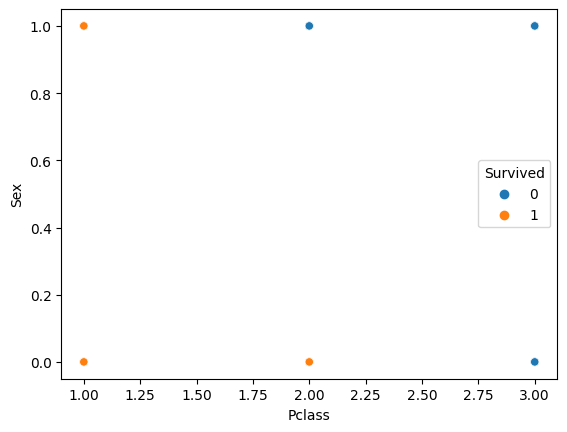

In [33]:
sns.scatterplot(data=train_data,x='Pclass',y='Sex',hue='Survived')

# Testing Different Models

In [34]:
from sklearn.svm import SVC

SVC_model = SVC(kernel='linear',C=1.0)
trained_SVC_model = SVC_model.fit(X=X_train,y=y_train)

In [35]:
SVC_results = trained_SVC_model.predict(test_data)

print(SVC_results)

[0 1 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 0 1
 1 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 1 1 0 1 0
 1 0 0 1 0 1 0 0 0 0 0 0 1 1 1 0 1 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 0 1 1 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0
 0 0 1 0 0 1 0 0 1 1 0 1 1 0 1 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 1 0 0 1 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 0 0 1 1 0
 0 1 0 0 1 1 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 0 1 1 1 1 1 0 1 0 0 0]


Linear SVC = 0.77511

In [36]:
from sklearn.tree import DecisionTreeClassifier

DTC_model = DecisionTreeClassifier()
trained_DTC_model = DTC_model.fit(X=X_train,y=y_train)

In [37]:
DTC_results = trained_DTC_model.predict(test_data)

print(DTC_results)

[0 0 0 1 0 0 0 1 0 0 0 0 1 0 1 1 0 1 1 0 1 1 1 0 1 0 1 1 1 0 0 1 0 0 1 1 1
 0 0 1 0 1 0 1 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 1 1 0 0 1 1 1 0 1 1
 1 1 0 1 0 1 1 0 0 0 0 0 1 1 0 1 0 0 0 1 0 0 1 1 0 0 1 0 0 0 1 0 0 1 0 0 0
 1 1 0 1 0 0 1 1 1 1 0 1 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0
 1 1 1 0 0 1 0 0 1 1 1 1 0 1 1 1 0 0 0 0 1 0 0 0 0 0 1 1 1 1 1 1 0 1 1 0 1
 0 1 1 0 0 0 1 1 0 1 0 1 0 0 1 1 0 1 1 0 0 0 0 1 0 0 1 0 0 0 0 0 1 1 0 1 0
 1 0 1 1 0 0 0 0 0 1 1 0 1 0 1 1 1 1 1 1 1 0 0 0 1 0 1 1 1 0 1 0 0 0 0 0 1
 0 0 0 1 1 0 0 1 0 1 0 1 0 1 1 1 1 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 1 0 1 1 1 1 0 1 0 0 1 0 1 0 0 1 0 0 0 1 1 0 1 1 0 0 1 1 1
 1 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 1 1 0 0 1 1 0 1 0 0 0 0 1 1 1 1 0 0 0 1 0
 0 1 0 0 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 1 1 1 0 0 1 1 0 1 0 0 1 0 1 0 1 0 0
 1 0 1 0 1 1 1 1 1 0 1]


DTC = 0.70574

In [38]:
from sklearn.neighbors import KNeighborsClassifier

KNN_model = KNeighborsClassifier(n_neighbors=1)
trained_KNN_model = KNN_model.fit(X=X_train, y=y_train)

In [39]:
KNN_results = trained_KNN_model.predict(test_data)

print(KNN_results)

[0 0 0 0 0 0 0 1 0 1 0 0 1 0 1 1 0 0 0 0 1 0 1 1 1 0 1 0 1 0 0 1 0 1 1 0 0
 0 0 1 0 1 0 0 1 0 1 0 1 0 1 0 1 1 0 0 0 0 0 1 0 0 0 0 1 1 0 1 1 1 0 0 0 1
 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0
 0 1 0 1 0 0 0 1 1 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 1 1 1 1 0 0 1 0
 1 1 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 1 1 1 1 1 1 0 1 1 0 1
 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 1 0 0 1 0 1 1 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0
 1 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 1 0 1 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 1 1 0 0 1 0 0 0 1 1 0 0 1 1 0 1 1 0
 0 1 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 1 0 0 1 0 1 1 0 0 0
 1 0 0 0 1 0 0 1 0 0 0]


KNN = 0.63875

In [40]:
from sklearn.ensemble import RandomForestClassifier

RFC_model = RandomForestClassifier()
trained_RFC_model = RFC_model.fit(X=X_train, y=y_train)

In [41]:
RFC_results = trained_RFC_model.predict(test_data)

print(RFC_results)

[0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 0 0 0 0 1 1 1 0 1 0 1 0 0 0 0 0 1 0 0
 0 0 1 0 1 0 1 1 0 1 0 1 0 1 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 0 0 1 1 0 0 0 1
 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0
 0 1 1 1 0 0 1 0 1 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0
 1 0 1 0 0 1 0 0 1 0 1 1 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 1 1 0 1 1 0 1
 0 1 0 0 0 0 0 1 0 1 0 1 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0
 1 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 0 1 0 1 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0
 1 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 1 1 0
 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 0 0 0 1 1 1 0 0 0 0 1 1 0 1 0 0 0 1 0
 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 1 0 0
 0 1 1 0 1 0 0 1 0 0 0]


RFC = 0.77511

In [42]:
accuracy_table = pd.DataFrame({'Method': ['RFC', 'SVC', 'DTC', 'KNN'], 'Accuracy': [0.77511, 0.77511, 0.70574, 0.63875]})
accuracy_table

,Method,Accuracy
0,RFC,0.77511
1,SVC,0.77511
2,DTC,0.70574
3,KNN,0.63875


# Testing with Scaling

In [43]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_test_data = scaler.transform(test_data)

In [44]:
SVC_model = SVC(kernel='linear',C=1.0)
scaled_SVC_model = SVC_model.fit(X=scaled_X_train,y=y_train)

In [45]:
scaled_SVC_results = scaled_SVC_model.predict(scaled_test_data)

print(scaled_SVC_results)

[0 1 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 0 1
 1 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 1 1 0 1 0
 1 0 0 1 0 1 0 0 0 0 0 0 1 1 1 0 1 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 0 1 1 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0
 0 0 1 0 0 1 0 0 1 1 0 1 1 0 1 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 0 1 0 0 0 0 0 0 0 0 1 0 1 1 0 0 1 0 0 1 0 1 0 0 0 0 1 1 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 1 0 1 1 0
 0 1 0 0 1 1 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 0 1 1 1 1 1 0 1 0 0 0]


SVC with Scaling = 0.76

# Test with Scaling and Cross Validation

In [46]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_test_data = scaler.transform(test_data)

In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

log_model = LogisticRegression()

In [48]:
penalty = ['l1', 'l2', 'elasticnet']
l1_ratio = np.linspace(0,1,20)
C = np.logspace(0,10,20)

param_grid = {'penalty': penalty, 'l1_ratio': l1_ratio, 'C':C}

grid_model = GridSearchCV(log_model, param_grid=param_grid)

grid_model.fit(scaled_X_train, y_train)

grid_model.best_params_

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_

{'C': 11.28837891684689, 'l1_ratio': 0.0, 'penalty': 'l2'}

In [49]:
log_results = grid_model.predict(scaled_test_data)

print(log_results)

[0 0 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 0 1 0 0 0 0 0 1 1 0 0 1
 1 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 1 1 0 1 0
 1 1 0 1 0 1 0 0 0 0 0 0 1 1 1 0 1 0 1 0 1 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 0 1 1 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0
 0 0 1 0 0 1 0 0 1 1 0 1 1 0 1 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 0 0 0 0 1 0 0 0 0 1 1 0 1 1 0 0 1 0 1 1 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 1 1 0 1 0 0 0 0 0 1
 0 0 0 1 1 0 0 1 0 1 0 0 0 1 1 0 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 0 0 1 1 0
 0 1 0 0 1 1 1 0 0 0 0 0 1 1 0 1 0 0 0 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 0 0
 0 1 1 1 1 1 0 1 0 0 0]


# Submission

In [50]:
submission = pd.DataFrame(test_data['PassengerId'])
submission.insert(value=log_results, column='Survived',loc=1)
print(submission)

     PassengerId  Survived
0            892         0
1            893         0
2            894         0
3            895         0
4            896         1
..           ...       ...
413         1305         0
414         1306         1
415         1307         0
416         1308         0
417         1309         0

[418 rows x 2 columns]


In [51]:
submission.to_csv('submission.csv', index=False)